In [74]:
#!pip install numpy
#!pip install pandas
#!conda install scikit-learn -y
#!pip install matplotlib
#!pip install seaborn
!pip freeze > requirements.txt

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression

import pickle

import warnings


In [3]:
warnings.filterwarnings('ignore')

In [4]:
def print_cv_scores(scores):
    print("Fit Time : ", scores['fit_time']," mean= ",(sum(scores['fit_time']))/5)
    print("Score Time : ", scores['score_time']," mean= ",(sum(scores['score_time']))/5)
    print("Test Accuracy : ",scores['test_accuracy'], " mean= ",(sum(scores['test_accuracy']))/5)
    print("F1 Score : ", scores['test_f1']," mean= ",(sum(scores['test_f1']))/5)
    print("Test Precision : ", scores['test_precision']," mean= ",(sum(scores['test_precision']))/5)
    print("Test Recall : ", scores['test_recall']," mean= ",(sum(scores['test_recall']))/5)

In [5]:
def print_fit_scores(y_true, y_pred):
    print("Test Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1 Score : ", f1_score(y_true, y_pred))
    print("Test Precision : ", precision_score(y_true, y_pred))
    print("Test Recall : ", recall_score(y_true, y_pred))
    

In [6]:
path=""
#.csv uzantılı verisetinin dosya yolu girilmeli

In [7]:
pd.set_option("display.max_rows", None,
             "display.max_columns", None)

In [8]:
SEED=12345 #ilerde seed kullanılacak yerler için 

In [9]:
ds=pd.read_csv(path)

In [10]:
#Exploratory Data Analysis burada başlıyor

In [11]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [12]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
ds.shape

(1470, 35)

In [14]:
ds.isnull().sum() #null veri yok

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
ds['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [16]:
ds.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [17]:
#attrition olan ve olmayanlara göre öznitelikleri inceleyebilmek için
#iki ayrı datasete bölüyorum
#Bu adım yalnızca görselleştirmek ve analiz etmek için 
# Attrition -> ds_pos
# No attrition -> ds_neg

In [18]:
ds['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [19]:
ds_pos_ix=list()
ds_neg_ix=list()

In [20]:
for i in range(len(ds)):
    if ds.loc[i,'Attrition']== 'Yes':
        ds_pos_ix.append(i)
    elif ds.loc[i,'Attrition']== 'No':
        ds_neg_ix.append(i)
    else:
        print("wrong input")
    i+=1

In [21]:
ds.loc[ds_pos_ix,:].describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237,237,237.000000,237,237.000000,237.000000,237,237.0,237.000000,237.000000,237,237.000000,237.000000,237.000000,237,237.000000,237,237.000000,237.000000,237.000000,237,237,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
unique,NaN,1,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Yes,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Laboratory Technician,NaN,Single,NaN,NaN,NaN,Y,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,237,156,NaN,133,NaN,NaN,89,NaN,NaN,NaN,150,NaN,NaN,NaN,62,NaN,120,NaN,NaN,NaN,237,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33.607595,NaN,NaN,750.362869,NaN,10.632911,2.839662,NaN,1.0,1010.345992,2.464135,NaN,65.573840,2.518987,1.637131,NaN,2.468354,NaN,4787.092827,14559.308017,2.940928,NaN,NaN,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,NaN,NaN,401.899519,NaN,8.452525,1.008244,NaN,0.0,580.750572,1.169791,NaN,20.099958,0.773405,0.940594,NaN,1.118058,NaN,3640.210367,7208.153264,2.678519,NaN,NaN,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,NaN,NaN,103.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,31.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2326.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,NaN,NaN,408.000000,NaN,3.000000,2.000000,NaN,1.0,514.000000,1.000000,NaN,50.000000,2.000000,1.000000,NaN,1.000000,NaN,2373.000000,8870.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,NaN,NaN,699.000000,NaN,9.000000,3.000000,NaN,1.0,1017.000000,3.000000,NaN,66.000000,3.000000,1.000000,NaN,3.000000,NaN,3202.000000,14618.000000,1.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,NaN,NaN,1092.000000,NaN,17.000000,4.000000,NaN,1.0,1486.000000,4.000000,NaN,84.000000,3.000000,2.000000,NaN,3.000000,NaN,5916.000000,21081.000000,5.000000,NaN,NaN,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000


In [22]:
ds.loc[ds_neg_ix,:].describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233,1233,1233.000000,1233,1233.000000,1233.000000,1233,1233.0,1233.000000,1233.000000,1233,1233.000000,1233.000000,1233.000000,1233,1233.000000,1233,1233.000000,1233.000000,1233.00000,1233,1233,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
unique,NaN,1,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,887,NaN,828,NaN,NaN,517,NaN,NaN,NaN,732,NaN,NaN,NaN,269,NaN,589,NaN,NaN,NaN,1233,944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.561233,NaN,NaN,812.504461,NaN,8.915653,2.927007,NaN,1.0,1027.656123,2.771290,NaN,65.952149,2.770479,2.145985,NaN,2.778589,NaN,6832.739659,14265.779400,2.64558,NaN,NaN,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,NaN,NaN,403.208379,NaN,8.012633,1.027002,NaN,0.0,606.217074,1.071132,NaN,20.380754,0.692050,1.117933,NaN,1.093277,NaN,4818.208001,7102.260749,2.46009,NaN,NaN,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,2.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1051.000000,2094.000000,0.00000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,NaN,NaN,477.000000,NaN,2.000000,2.000000,NaN,1.0,483.000000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,3211.000000,7973.000000,1.00000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,817.000000,NaN,7.000000,3.000000,NaN,1.0,1022.000000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,5204.000000,14120.000000,2.00000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1176.000000,NaN,13.000000,4.000000,NaN,1.0,1574.000000,4.000000,NaN,83.000000,3.000000,3.000000,NaN,4.000000,NaN,8834.000000,20364.000000,4.00000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000


In [23]:
#Yukarıda describe() ile attrition=yes ve attrition=no olan çalışanlar
#için elde edilen bilgilere göre;
#StandardHour herkes için aynı
#EmployeeCount her zaman 1
#Over18 her zaman yes
#EmployeeNumber irrelevant olabilir


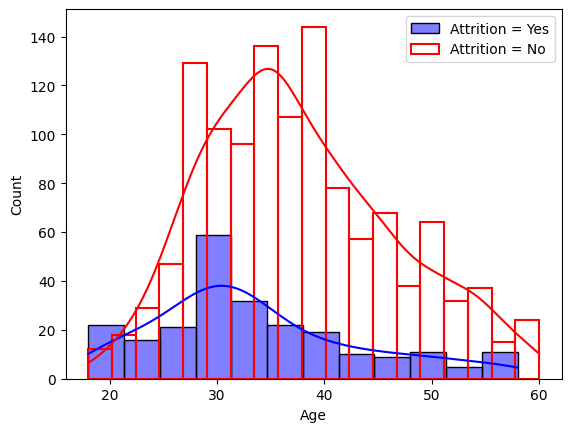

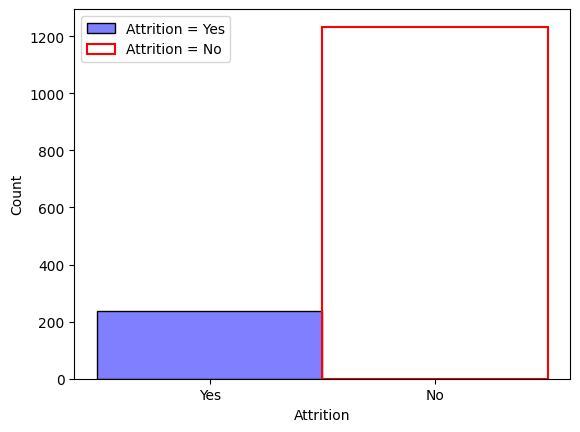

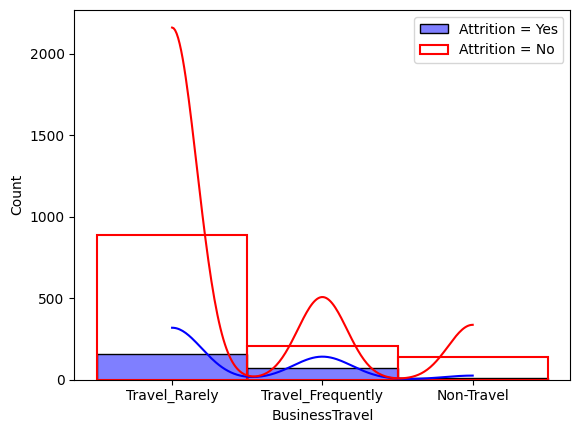

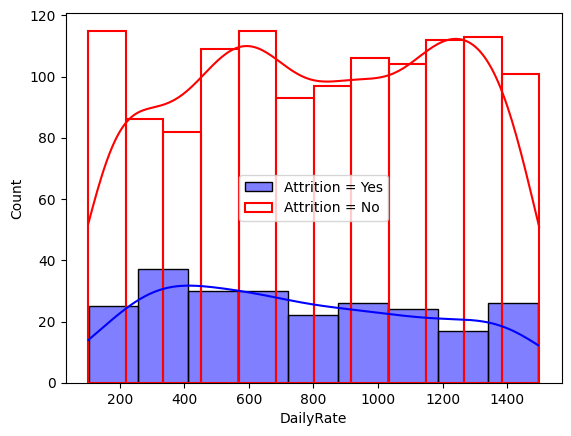

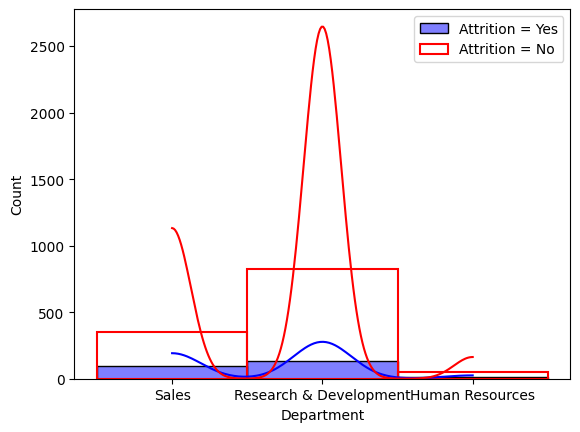

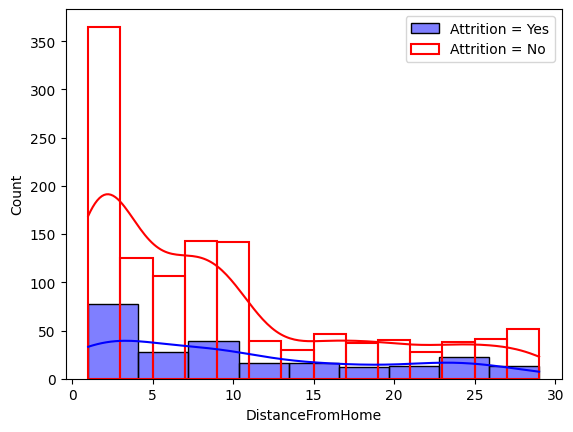

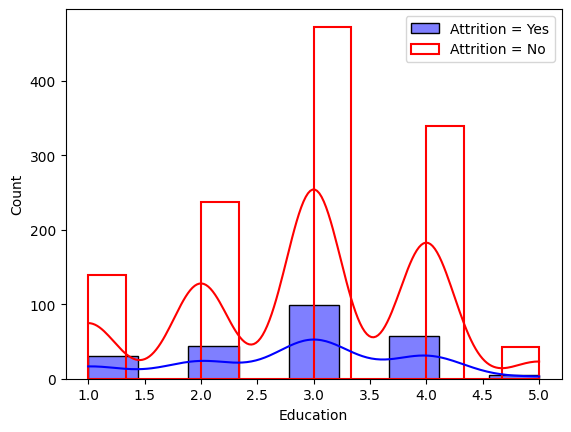

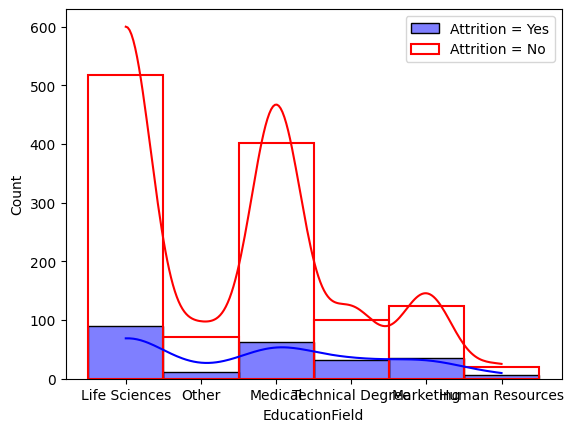

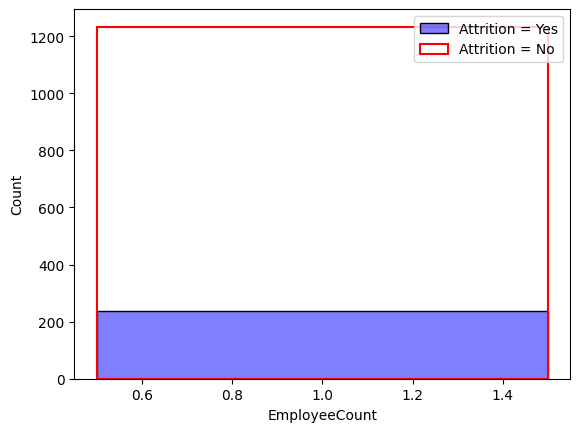

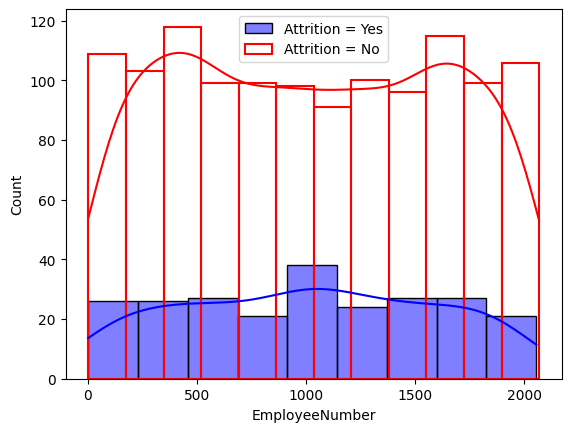

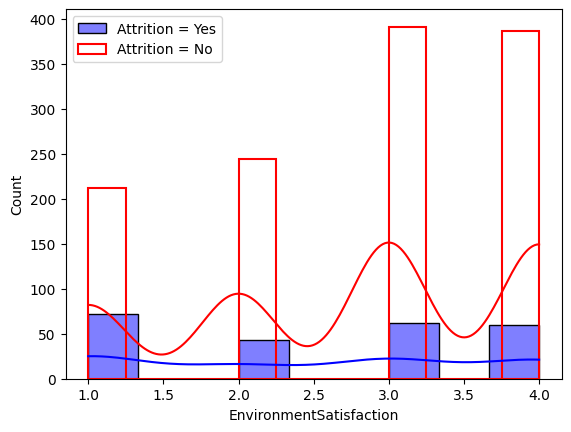

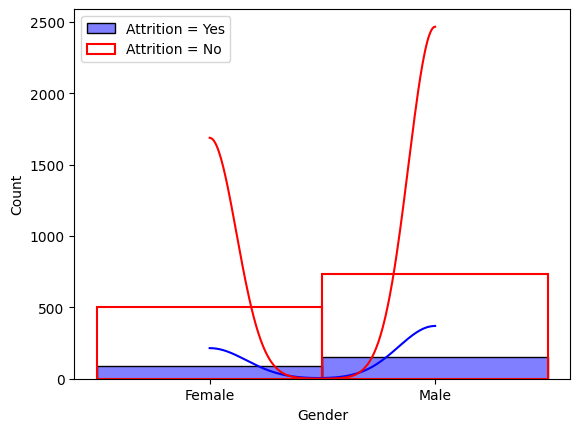

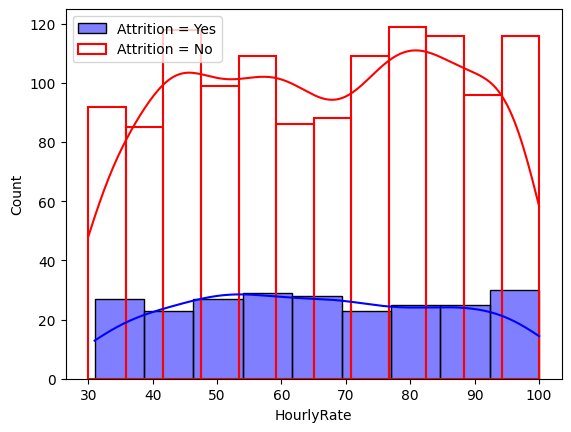

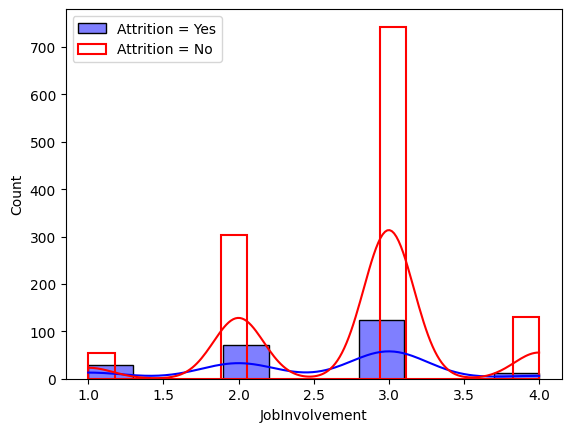

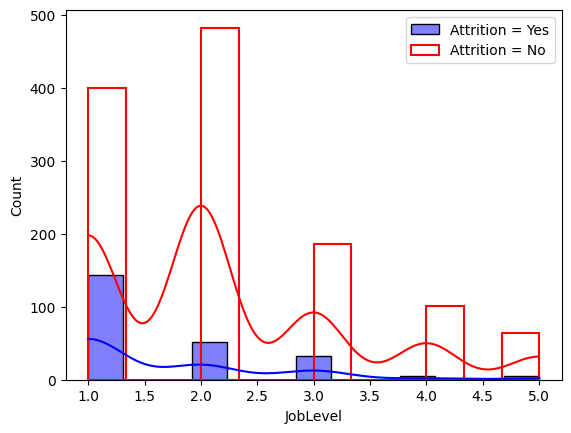

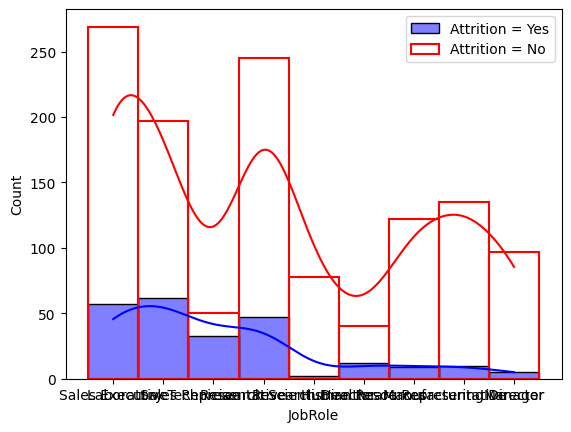

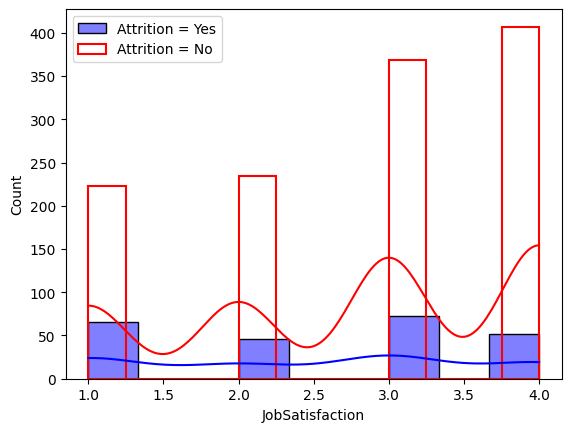

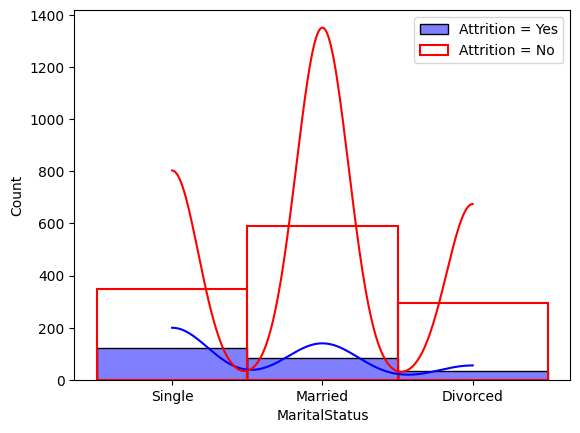

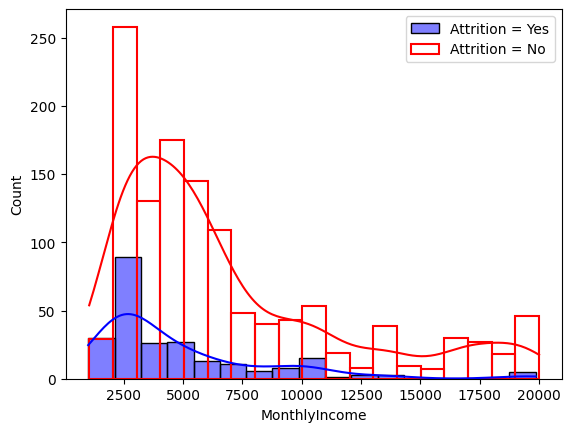

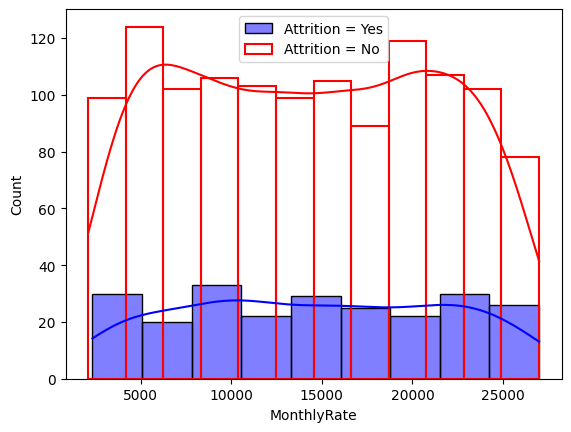

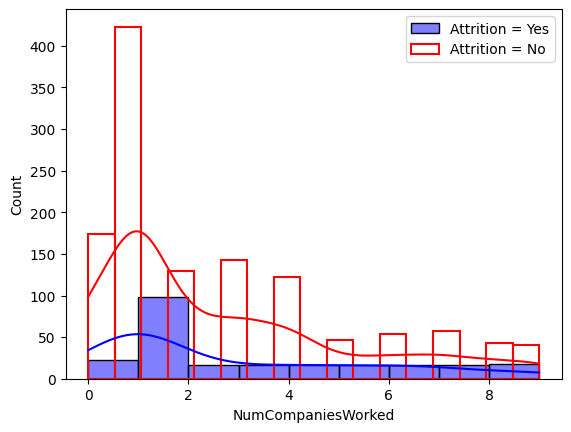

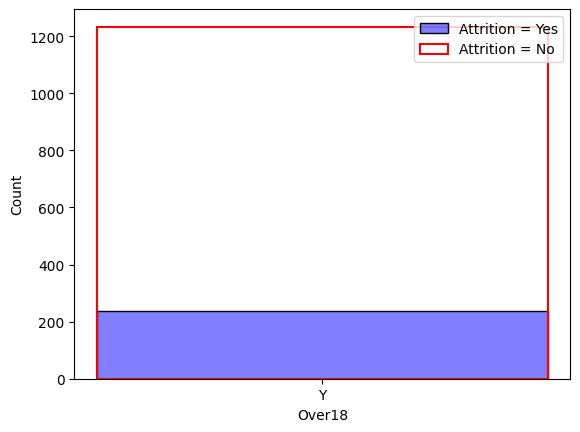

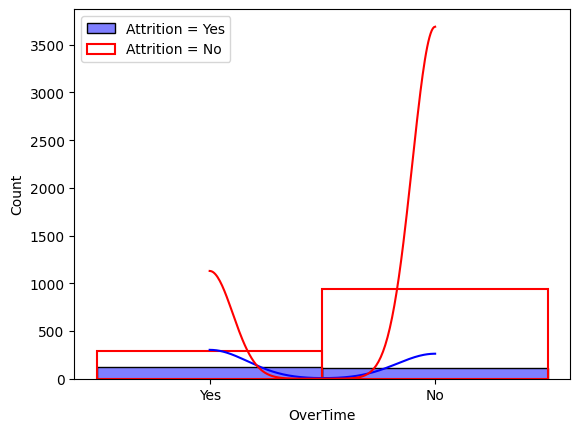

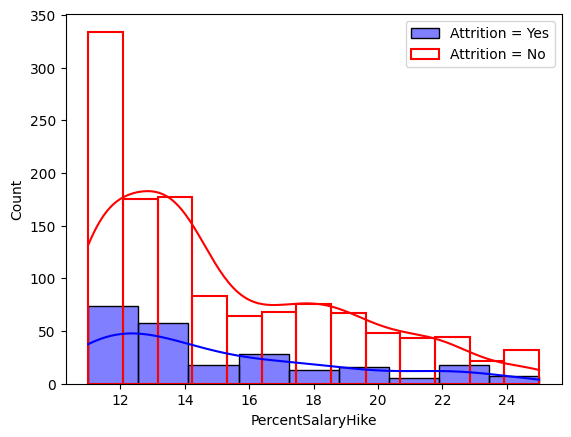

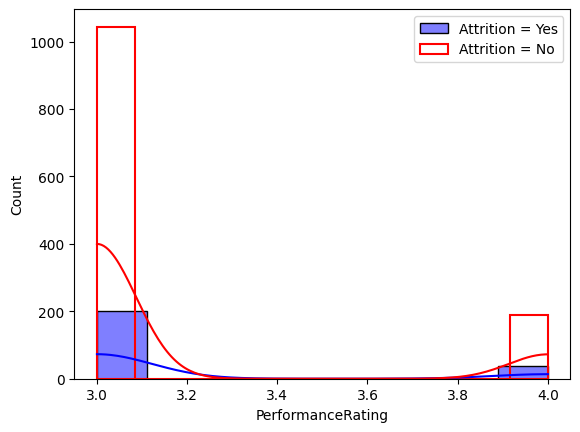

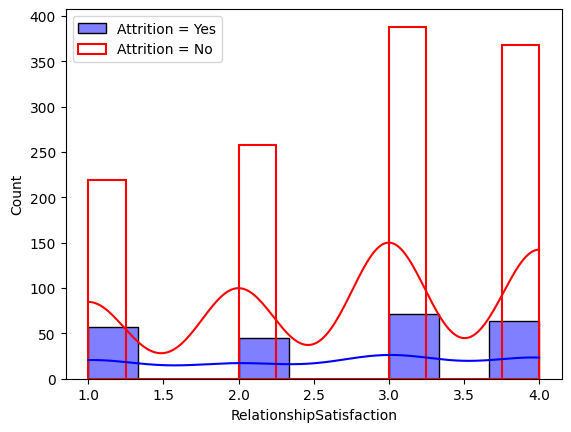

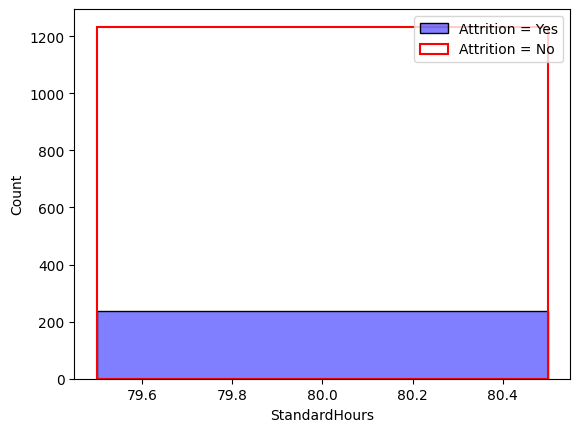

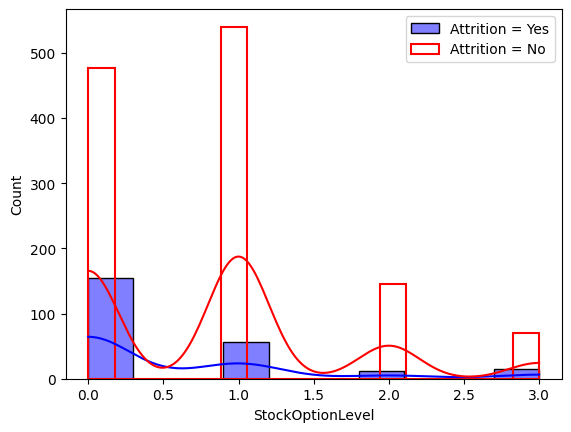

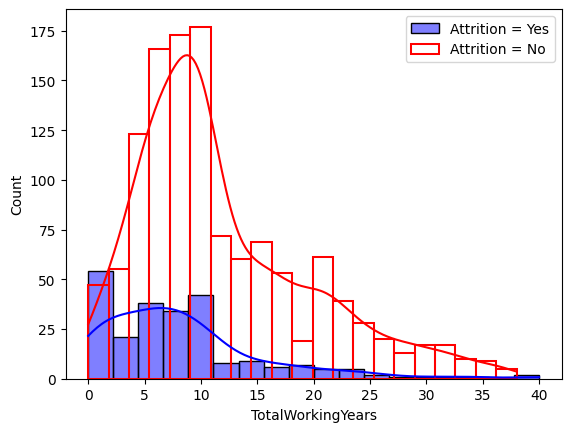

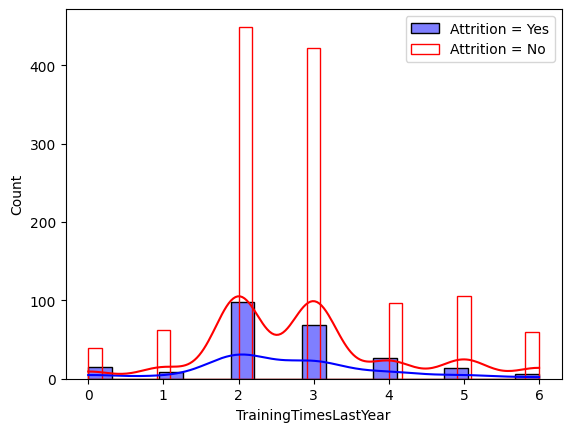

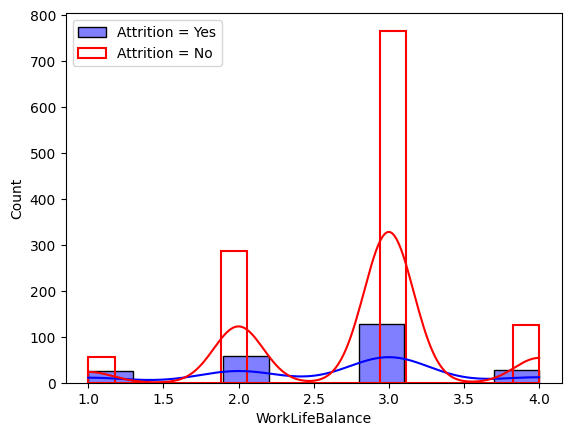

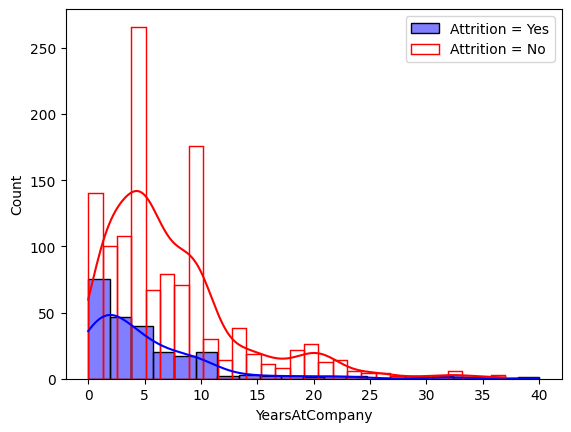

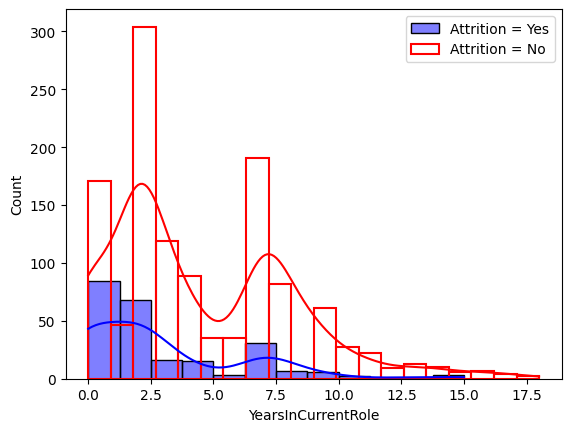

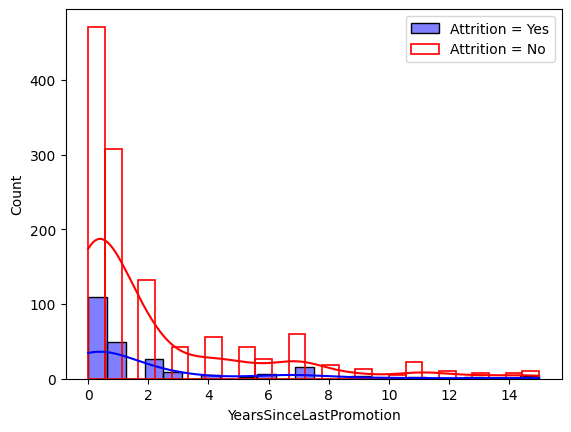

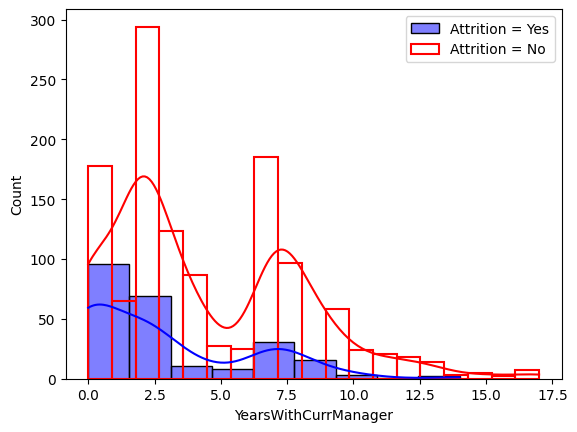

In [24]:
for i in range(len(ds.columns)):
    sns.histplot(data=ds.iloc[ds_pos_ix,i], kde=True, color='blue', label='Attrition = Yes')
    sns.histplot(data=ds.iloc[ds_neg_ix,i], kde=True, color='red', fill=False, label='Attrition = No')
    plt.legend()
    plt.show() 

<AxesSubplot: >

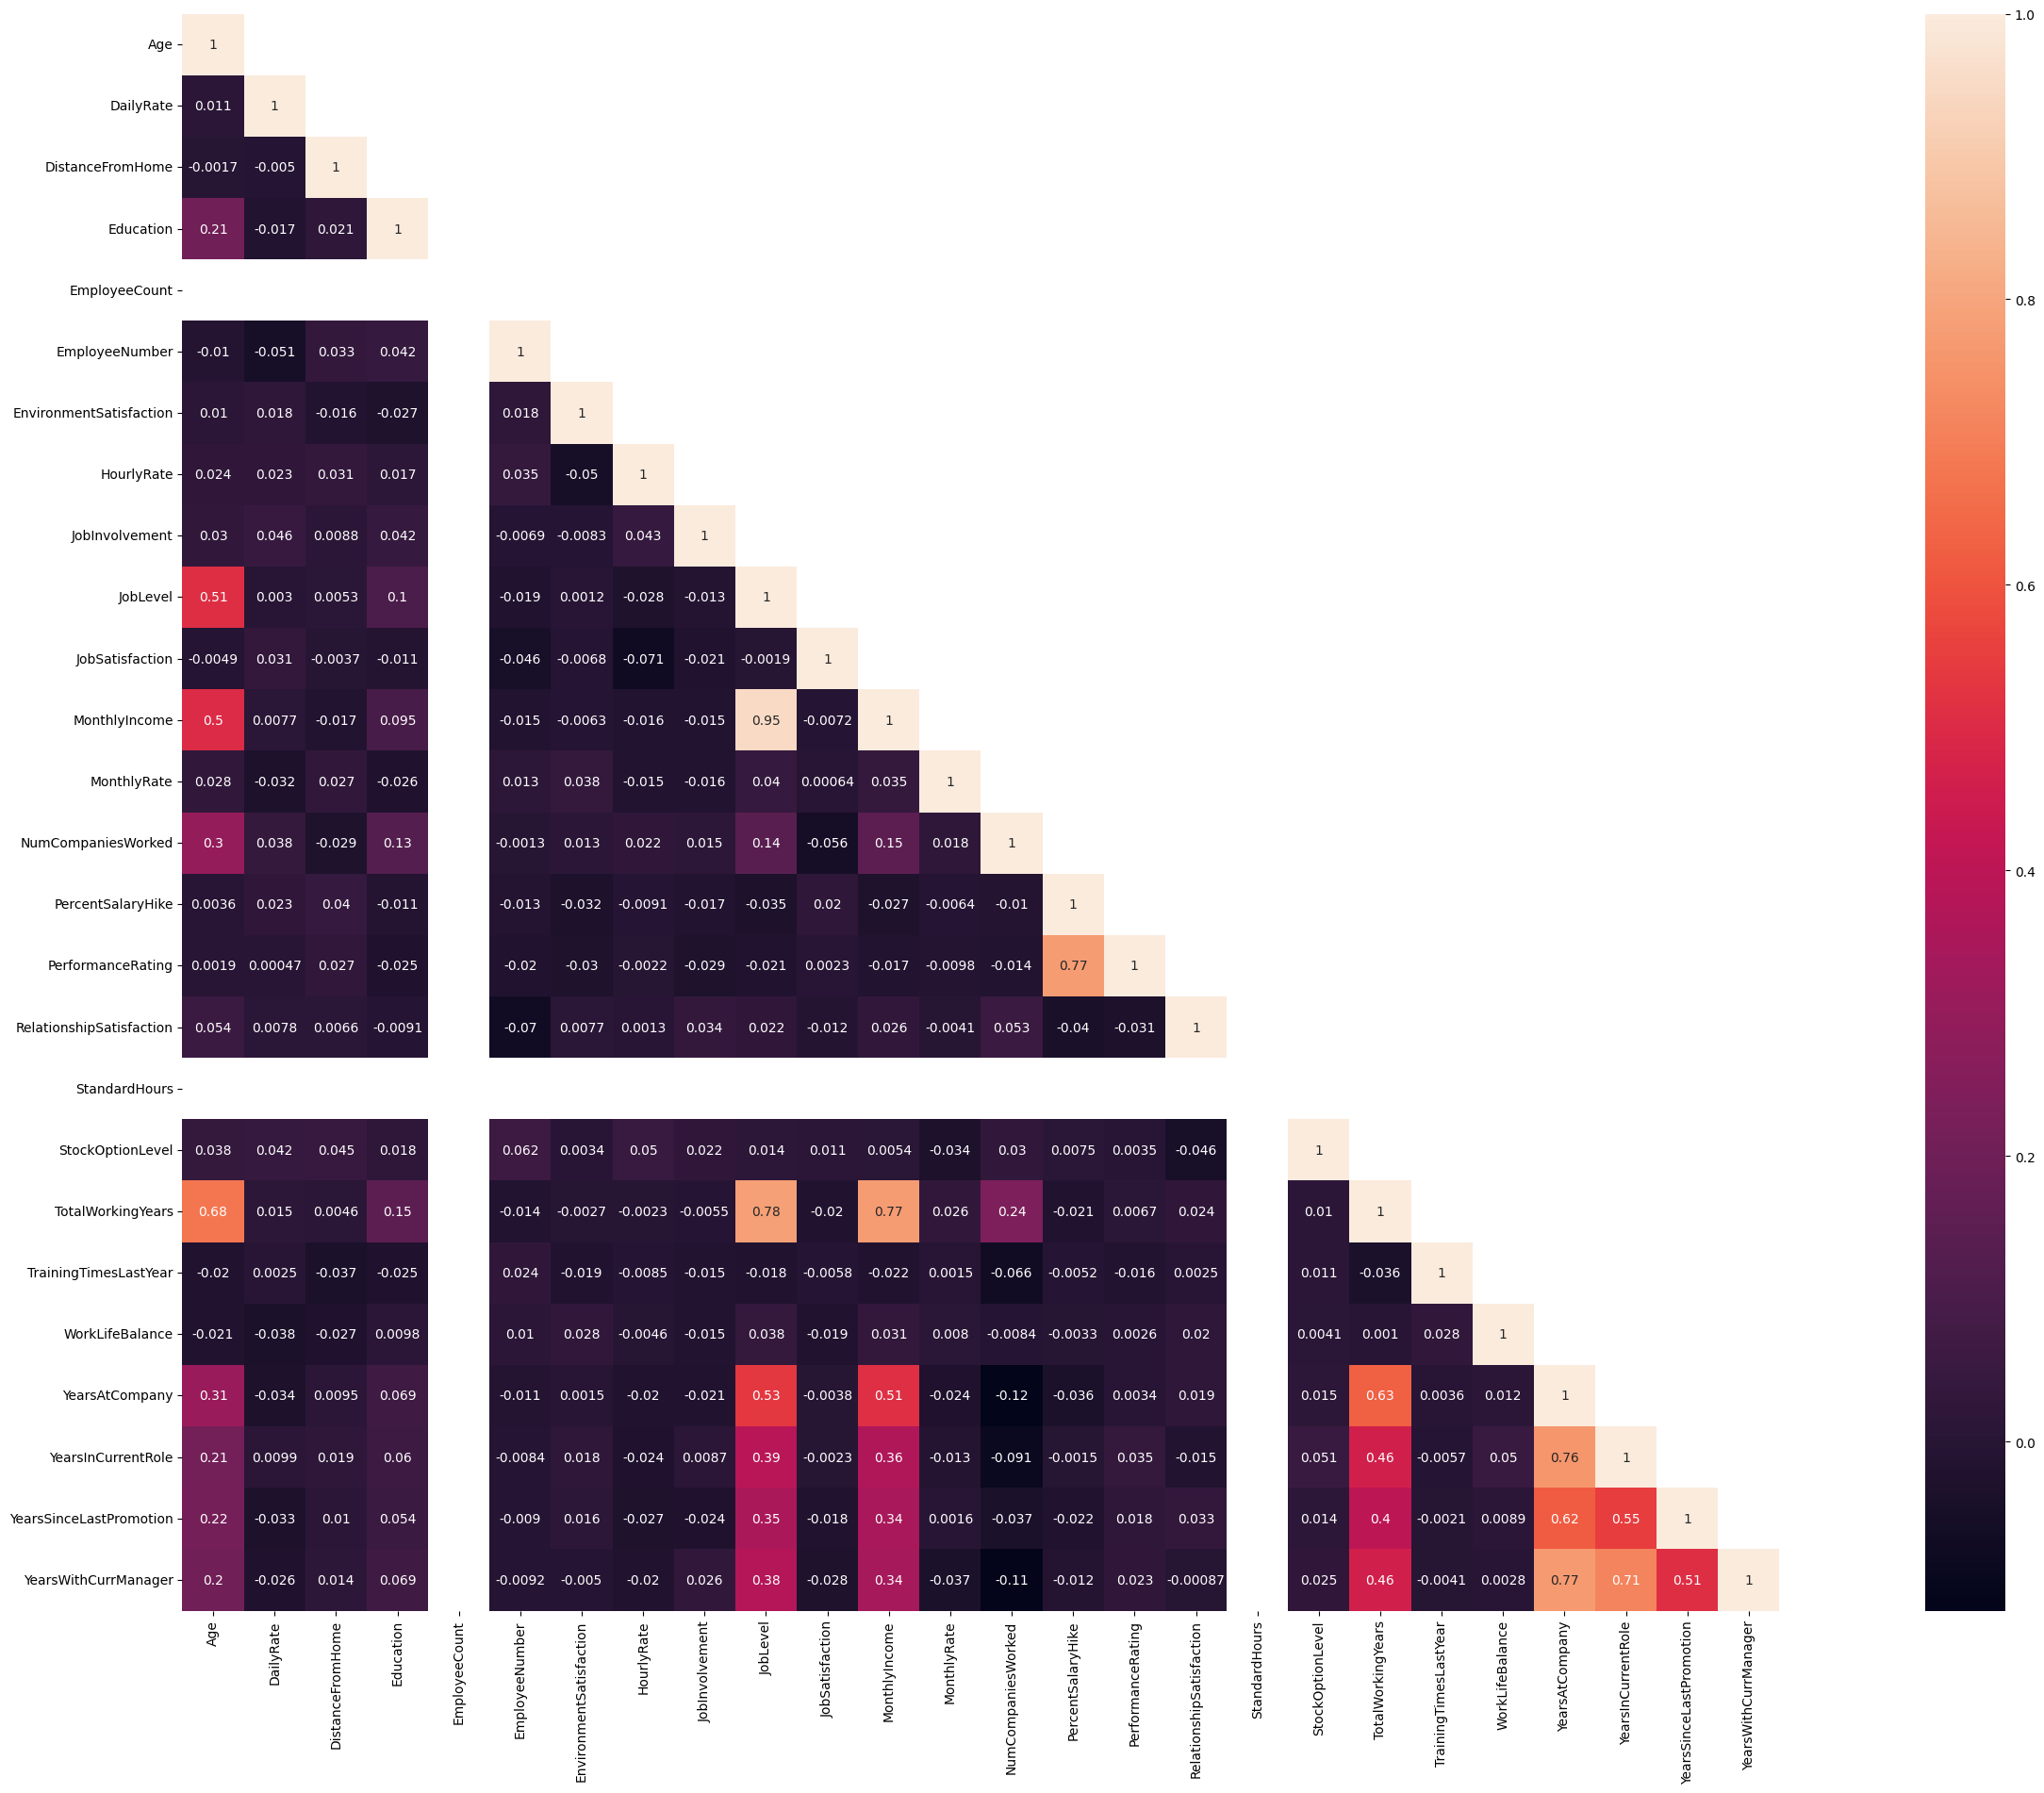

In [25]:
ds_corr=ds.corr()
mask=np.array(ds_corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(40,22)
sns.heatmap(data=ds_corr, mask=mask, square=True, annot=True, cbar=True)

In [26]:
#Feature Encoding

label_encoded_df=ds.copy()
le = preprocessing.LabelEncoder()
for col in label_encoded_df.select_dtypes(include=['object']).columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

In [27]:
#Veriyi bölmeden önce random_state=12345 kullanarak karıştırıyorum
label_encoded_df=label_encoded_df.sample(frac=1, random_state=SEED).reset_index()

In [28]:
attrition=label_encoded_df.loc[:,'Attrition']

<AxesSubplot: >

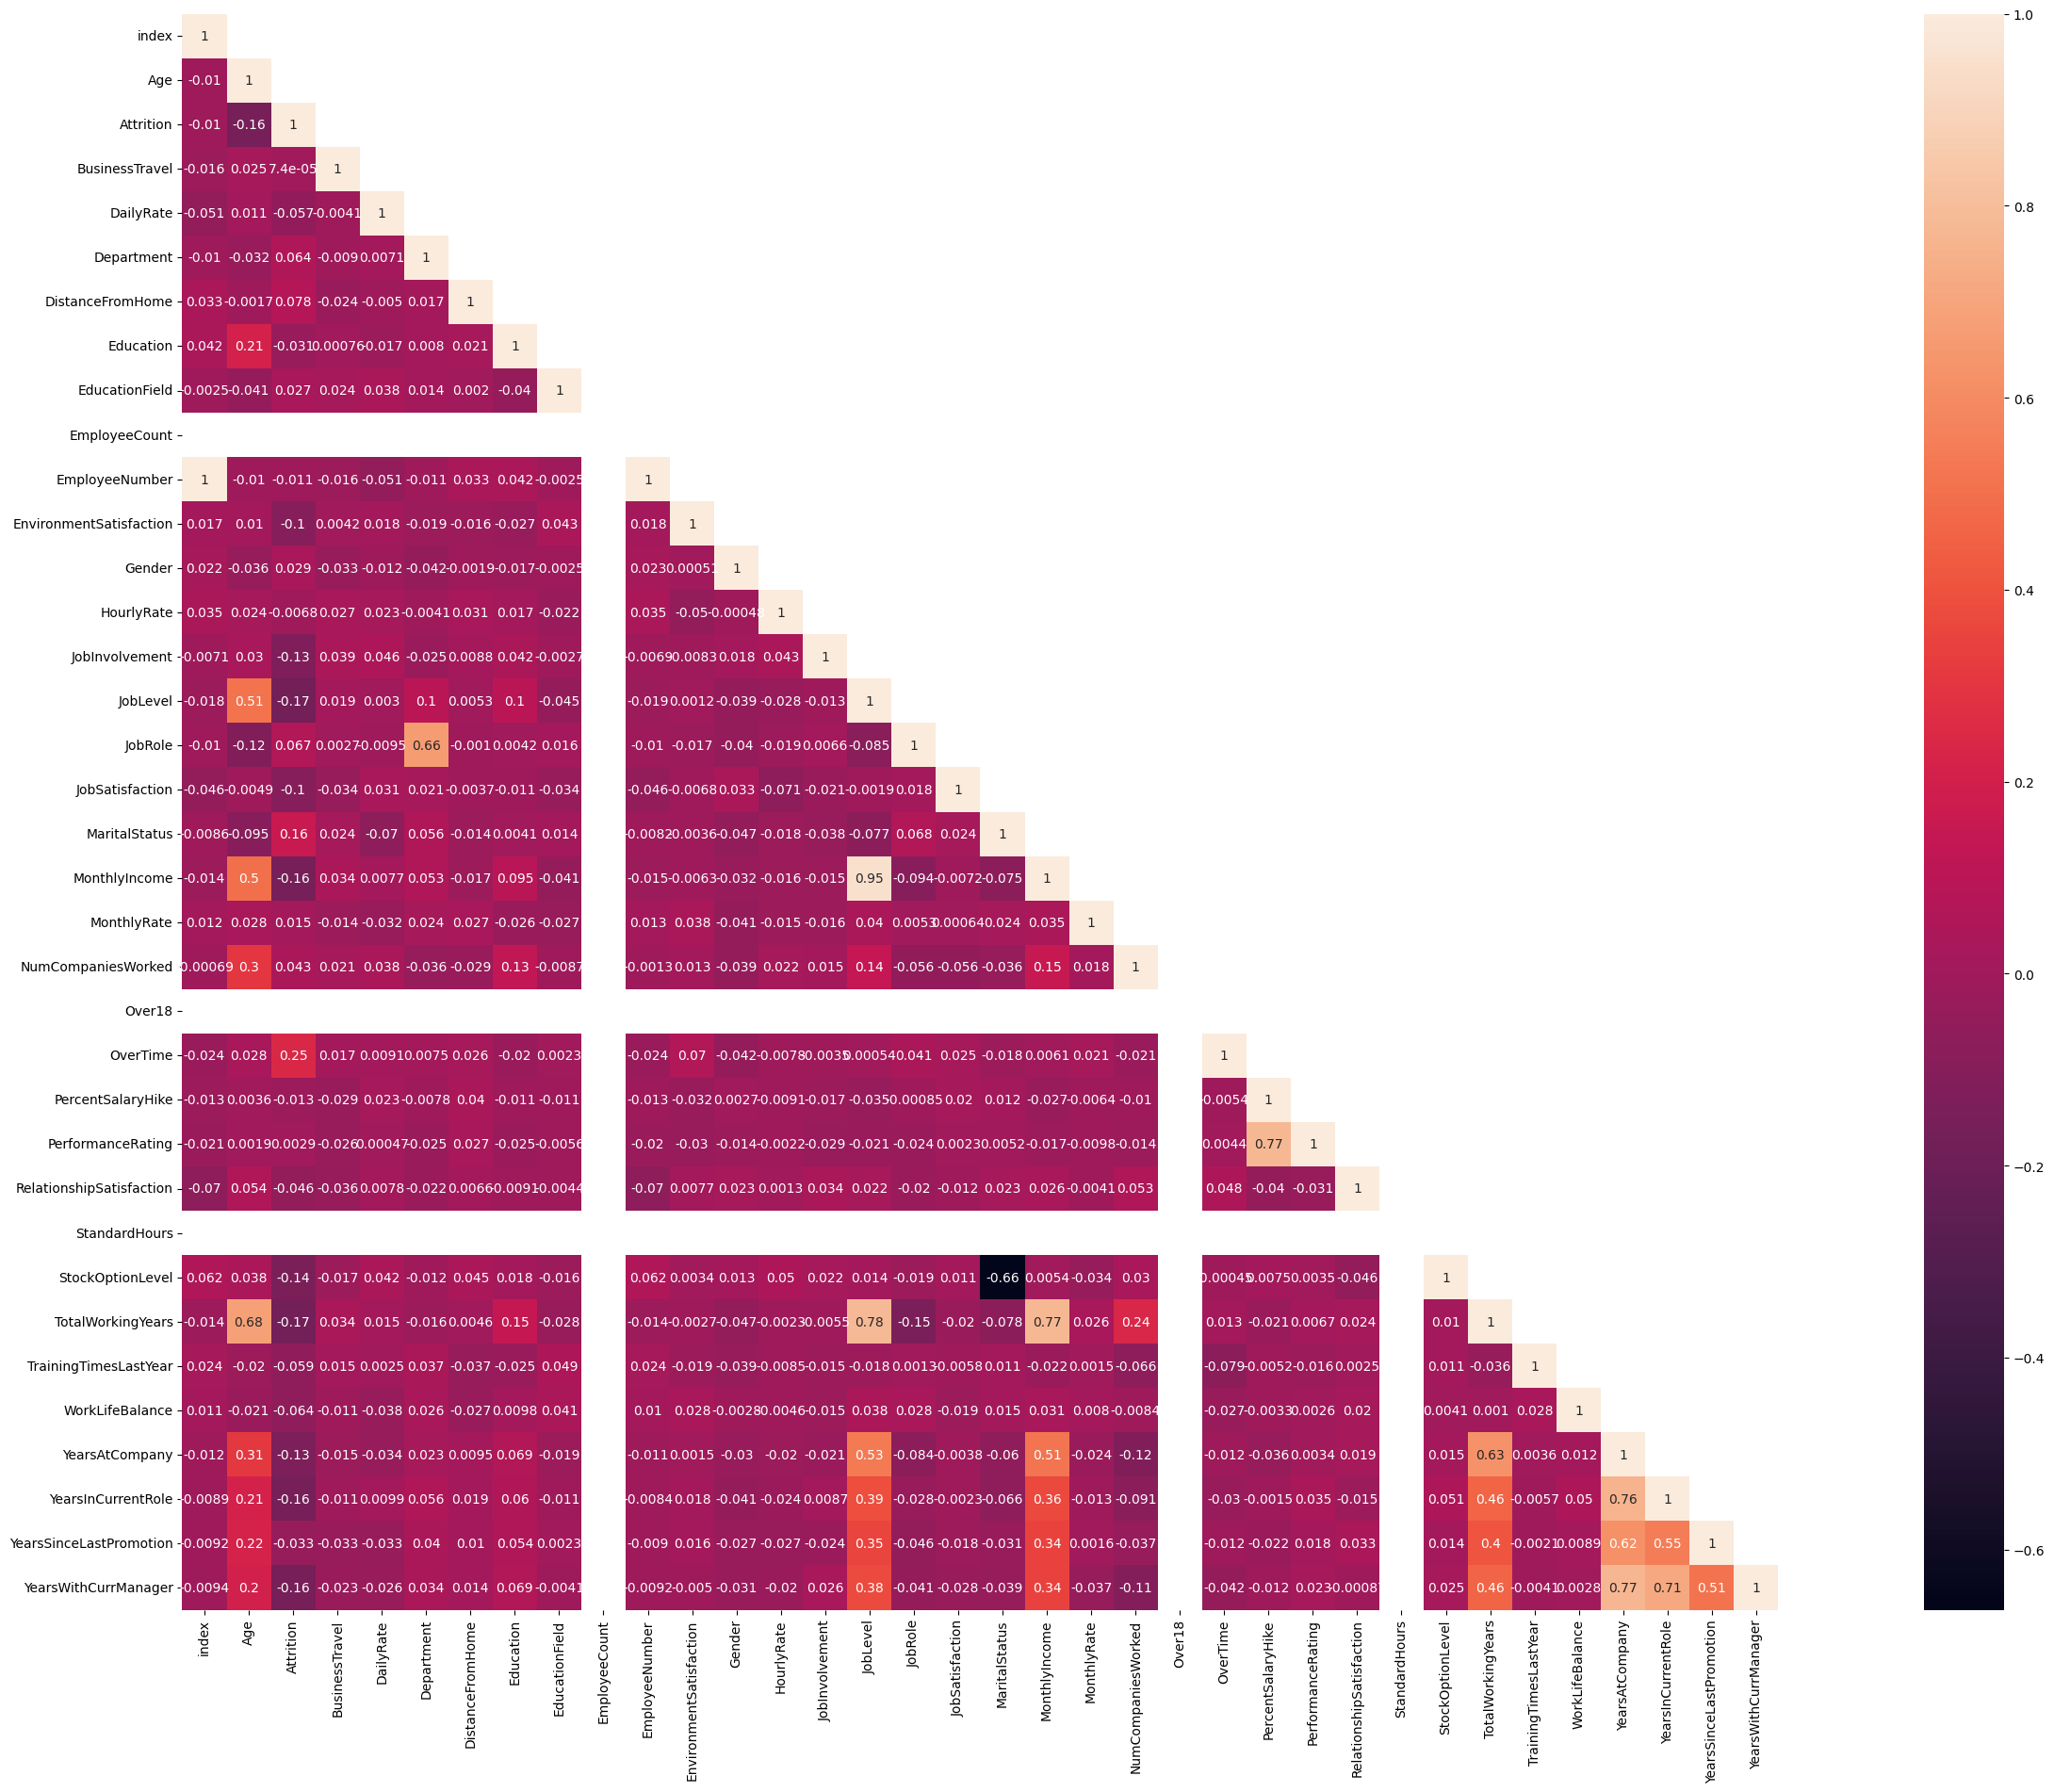

In [29]:
#Korelasyon incelemek için oluşturulan yukarıdaki heatmapte encode edilmemiş verilerle 
#ilgili bilgi verilmiyor. Onları da inceleyebilmek için encode edilmiş veriyle tekrar 
#oluşturuyoruz

le_df_corr=label_encoded_df.corr()
mask=np.array(le_df_corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(40,22)
sns.heatmap(data=le_df_corr, mask=mask, square=True, annot=True, cbar=True)

In [30]:

#EmployeeNumber tamamen sıralı ilerlemiyor ve irrelevant olup olmadığı kesin değil


In [31]:
#Targeti attrition isimli değişkene almıştık,
#Scaling yaparken çoğunlukla targeti scale etmeye gerek olmadığı ve
#target zaten 0 ve 1lerden oluştuğu için verisetinden kaldırıyoruz
label_encoded_df=label_encoded_df.drop('Attrition', axis=1) 

In [32]:
#diğer adımlara geçmeden önce label_encoded_df ile object type'lı verileri de 
#nümerik halde dahil ettiğimiz heatmapte açıkça görüldüğü ve önceden de analiz ettiğimiz
#StandardHour, EmployeeCount, Over18 featurelarını kaldırıyoruz

label_encoded_df=label_encoded_df.drop(['StandardHours','EmployeeCount','Over18'],axis=1)

In [33]:
scaler=preprocessing.StandardScaler()
scaled_df=scaler.fit_transform(label_encoded_df)

In [34]:
attrition[:10]

0    1
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: Attrition, dtype: int64

In [35]:
#Veriyi t-SNA ile iki boyutta görselleştirme denendi fakat anlamlı bir grafik elde edilmedi.

#from sklearn.manifold import TSNE
#new_df=label_encoded_df.drop(['Over18','StandardHours','EmployeeNumber','EmployeeCount'], axis=1)
#tsne=TSNE(learning_rate=50, perplexity=100)
#tsne_features=tsne.fit_transform(new_df)
#tsne_features.shape
#new_df['x']=tsne_features[:,0]
#new_df['y']=tsne_features[:,1]
#sns.scatterplot(x='x',y='y',hue='Attrition', data=new_df)
#plt.show()

In [36]:
#Train %80, test=%10, val=%10  
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

x_train, x_test, y_train, y_test = train_test_split(scaled_df, attrition, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(len(x_train), len(x_val), len(x_test))

1176 147 147


In [37]:
#Yukarıda veriseti train, val ve test setlerine ayrıldı.
#Train ve val x ve y'lerini birleştirip tek x, y olarak çapraz doğrulama gerçekleştiriyoruz
#Çapraz doğrulama kendisi train ve val ayrımını yapacak.
#Daha sonra overfit kontrolünü yapmak için modelle train datasını fitleyip
#çapraz doğrulama olmadan ve test seti ile skorlarını inceleyeceğiz

In [38]:
#Logistic Regression deneyi

In [39]:
model_lr=LogisticRegression()

In [40]:
cv=KFold(n_splits=5, shuffle=True, random_state=SEED)

In [41]:
x=np.append(x_train, x_val,axis=0)
y=np.append(y_train, y_val,axis=0)

In [42]:
scores_lr=cross_validate(model_lr, x, y, scoring=["accuracy","f1", "precision","recall"], cv=cv)

In [43]:
print_cv_scores(scores_lr)

Fit Time :  [0.06105089 0.00808597 0.00742507 0.02227998 0.02169609]  mean=  0.024107599258422853
Score Time :  [0.00103092 0.00355816 0.0008657  0.00129819 0.00316501]  mean=  0.0019835948944091795
Test Accuracy :  [0.83018868 0.8754717  0.89811321 0.875      0.83712121]  mean=  0.8631789594053745
F1 Score :  [0.36619718 0.49230769 0.63013699 0.49230769 0.33846154]  mean=  0.4638822184953769
Test Precision :  [0.59090909 0.66666667 0.65714286 0.72727273 0.57894737]  mean=  0.6441877420824789
Test Recall :  [0.26530612 0.3902439  0.60526316 0.37209302 0.23913043]  mean=  0.37440732816423267


In [44]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred_lr=model_lr.predict(x_test)

In [46]:
print_fit_scores(y_test,y_pred_lr)

Test Accuracy :  0.8571428571428571
F1 Score :  0.3225806451612903
Test Precision :  0.45454545454545453
Test Recall :  0.25


In [47]:
#SVM deneyi

In [48]:
model_svm = svm.SVC(kernel='linear')
#Değişik kerneller denendi ve en iyi performans linear kernelde elde edildi

In [49]:
scores_svm=cross_validate(model_svm, x, y, scoring=["accuracy","f1", "precision","recall"], cv=cv)

In [50]:
print_cv_scores(scores_svm)

Fit Time :  [0.04819775 0.033283   0.02872968 0.03169107 0.03387427]  mean=  0.03515515327453613
Score Time :  [0.00247025 0.00257683 0.00255418 0.00272012 0.00259376]  mean=  0.002583026885986328
Test Accuracy :  [0.83018868 0.8754717  0.87924528 0.88257576 0.84848485]  mean=  0.8631932532875929
F1 Score :  [0.34782609 0.47619048 0.46666667 0.50793651 0.35483871]  mean=  0.4306916894855184
Test Precision :  [0.6        0.68181818 0.63636364 0.8        0.6875    ]  mean=  0.6811363636363635
Test Recall :  [0.24489796 0.36585366 0.36842105 0.37209302 0.23913043]  mean=  0.3180792256780521


In [51]:
model_svm.fit(x_train,y_train)

SVC(kernel='linear')

In [52]:
y_pred_svm=model_svm.predict(x_test)

In [53]:
print_fit_scores(y_test,y_pred_svm)

Test Accuracy :  0.8843537414965986
F1 Score :  0.37037037037037035
Test Precision :  0.7142857142857143
Test Recall :  0.25


In [54]:
#Random Forest Deneyi

In [55]:
model_rf=RandomForestClassifier()

In [56]:
scores_rf=cross_validate(model_rf, x, y, scoring=["accuracy","f1", "precision","recall"], cv=cv)

In [57]:
print_cv_scores(scores_rf)

Fit Time :  [0.12020373 0.1139822  0.11813283 0.11869407 0.12294602]  mean=  0.11879177093505859
Score Time :  [0.00540733 0.00542879 0.00532794 0.00582314 0.00557017]  mean=  0.005511474609375
Test Accuracy :  [0.82641509 0.86415094 0.86037736 0.86742424 0.83712121]  mean=  0.8510977701543739
F1 Score :  [0.11538462 0.30769231 0.21276596 0.31372549 0.18867925]  mean=  0.2276495232005658
Test Precision :  [1.         0.72727273 0.55555556 1.         0.71428571]  mean=  0.7994227994227995
Test Recall :  [0.06122449 0.19512195 0.13157895 0.18604651 0.10869565]  mean=  0.13653351043713433


In [58]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred_rf=model_rf.predict(x_test)

In [60]:
print_fit_scores(y_test,y_pred_rf)

Test Accuracy :  0.8843537414965986
F1 Score :  0.37037037037037035
Test Precision :  0.7142857142857143
Test Recall :  0.25


In [61]:
#Feature Selection
#anlayabilmek için scale edilmemiş veriyle inceleyeceğim

In [62]:
x_fs=SelectKBest(k=5).fit_transform(scaled_df, attrition)

In [64]:
len(x_fs)

1470

In [65]:
#Train %80, test=%10, val=%10  
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(x_fs, attrition, test_size=1 - train_ratio)

x_val_fs, x_test_fs, y_val_fs, y_test_fs = train_test_split(x_test_fs, y_test_fs, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(len(x_train), len(x_val), len(x_test))

1176 147 147


In [66]:
x_fs=np.append(x_train_fs, x_val_fs,axis=0)
y_fs=np.append(y_train_fs, y_val_fs,axis=0)

In [67]:
model_svm_fs = svm.SVC(kernel='linear')

In [68]:
scores_svm_fs=cross_validate(model_svm_fs, x, y, scoring=["accuracy","f1", "precision","recall"], cv=cv)

In [69]:
print_cv_scores(scores_svm_fs)

Fit Time :  [0.04177308 0.04270792 0.02839231 0.03048921 0.03259015]  mean=  0.0351905345916748
Score Time :  [0.00316501 0.00263238 0.0024519  0.00235176 0.00232077]  mean=  0.002584362030029297
Test Accuracy :  [0.83018868 0.8754717  0.87924528 0.88257576 0.84848485]  mean=  0.8631932532875929
F1 Score :  [0.34782609 0.47619048 0.46666667 0.50793651 0.35483871]  mean=  0.4306916894855184
Test Precision :  [0.6        0.68181818 0.63636364 0.8        0.6875    ]  mean=  0.6811363636363635
Test Recall :  [0.24489796 0.36585366 0.36842105 0.37209302 0.23913043]  mean=  0.3180792256780521


In [70]:
model_svm_fs.fit(x_train_fs,y_train_fs)

SVC(kernel='linear')

In [71]:
y_pred_svm_fs=model_svm_fs.predict(x_test_fs)

In [72]:
print_fit_scores(y_test_fs,y_pred_svm_fs)

Test Accuracy :  0.8299319727891157
F1 Score :  0.0
Test Precision :  0.0
Test Recall :  0.0


In [ ]:
#Modelde iyileşme olmadı, hatta performans düştü. Test verisiyle F1 precision ve recall 
#hesaplanamamasının sebebi modelde verinin bozulup her x datası için y üretememiş olması olabilir